Basically Playing around with the api from the wonderful folks at https://covidtracking.com/api/

In [48]:
import pandas as pd 
import requests 
import seaborn as sns;sns.set()
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
import io
from datetime import datetime


# US daily data

In [121]:
response = requests.get('https://covidtracking.com/api/us/daily')
response_json = response.json() 
us = pd.DataFrame.from_dict(response_json)
us['datetime'] = us.date.astype(str).apply(lambda x: datetime.strptime(x,'%Y%m%d'))
us.date = us.date.astype(str).apply(lambda x: x.replace('2020',''))
us['pos_diff'] = us.positive.diff()

In [65]:
us

,date,states,positive,negative,posNeg,pending,death,total,pos_diff
0,2020-03-04,14,118,748,866,103,NaN,969,NaN
1,2020-03-05,24,176,953,1129,197,NaN,1326,58.0
2,2020-03-06,36,223,1571,1794,458,NaN,2252,47.0
3,2020-03-07,51,341,1809,2150,602,NaN,2752,118.0
4,2020-03-08,51,417,2335,2752,347,NaN,3099,76.0
5,2020-03-09,51,584,3367,3951,313,NaN,4264,167.0
6,2020-03-10,51,778,3807,4585,469,NaN,5054,194.0
7,2020-03-11,51,1053,5978,7031,563,27.0,7617,275.0
8,2020-03-12,51,1315,7949,9264,673,36.0,9966,262.0
9,2020-03-13,51,1922,13613,15535,1130,39.0,16665,607.0


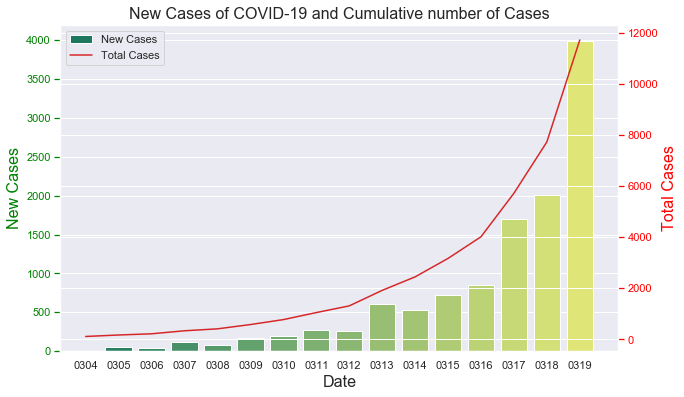

In [148]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
#bar plot creation
ax1.set_title('New Cases of COVID-19 and Cumulative number of Cases', fontsize=16)
ax1 = sns.barplot(x='date', y='pos_diff', data = us, palette='summer', label = 'New Cases')

# #specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2 = sns.lineplot(x='date', y='positive', data = us, color=color,sort=False, label = 'Total Cases')
ax2.get_legend().remove()
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax2.transAxes)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('New Cases', fontsize=16)
_ = ax2.set_ylabel('Total Cases', fontsize=16)

ax1.tick_params(axis='y', colors='green')
ax1.yaxis.label.set_color('green')
ax2.yaxis.label.set_color('red')
ax2.tick_params(axis='y', colors='red')


---

# States daily data

In [49]:
response = requests.get('https://covidtracking.com/api/states/daily')
response_json = response.json() 
daily_data = pd.DataFrame.from_dict(response_json)

daily_data.dateChecked= daily_data.dateChecked.astype(str).apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ'))
daily_data['datetime'] = daily_data.date.astype(str).apply(lambda x: datetime.strptime(x,'%Y%m%d'))
daily_data.date = daily_data.date.astype(str).apply(lambda x: x.replace('2020',''))

daily_data['pos_diff'] = daily_data.groupby('state').positive.diff()*-1


In [50]:
daily_data['scaled_positives'] = daily_data['positive']/daily_data['total']
daily_data

,date,state,positive,negative,pending,death,total,dateChecked,scaled_positives,pos_diff
0,2020-03-18,AK,6.0,406.0,NaN,NaN,412.0,2020-03-18 20:00:00,0.014563,NaN
1,2020-03-18,AL,46.0,28.0,NaN,0.0,74.0,2020-03-18 20:00:00,0.621622,NaN
2,2020-03-18,AR,33.0,236.0,50.0,NaN,319.0,2020-03-18 20:00:00,0.103448,NaN
3,2020-03-18,AZ,28.0,148.0,102.0,0.0,278.0,2020-03-18 20:00:00,0.100719,NaN
4,2020-03-18,CA,611.0,7981.0,NaN,13.0,8592.0,2020-03-18 20:00:00,0.071113,NaN
5,2020-03-18,CO,183.0,1617.0,NaN,2.0,1800.0,2020-03-18 20:00:00,0.101667,NaN
6,2020-03-18,CT,68.0,125.0,NaN,NaN,193.0,2020-03-18 20:00:00,0.352332,NaN
7,2020-03-18,DC,31.0,138.0,1.0,NaN,170.0,2020-03-18 20:00:00,0.182353,NaN
8,2020-03-18,DE,25.0,36.0,NaN,NaN,61.0,2020-03-18 20:00:00,0.409836,NaN
9,2020-03-18,FL,314.0,1225.0,954.0,7.0,2493.0,2020-03-18 20:00:00,0.125953,NaN


In [4]:
response = requests.get('https://covidtracking.com/api/states')
response_json = response.json() 
to_date_data = pd.DataFrame.from_dict(response_json)

Good to know everything's correlated to each other

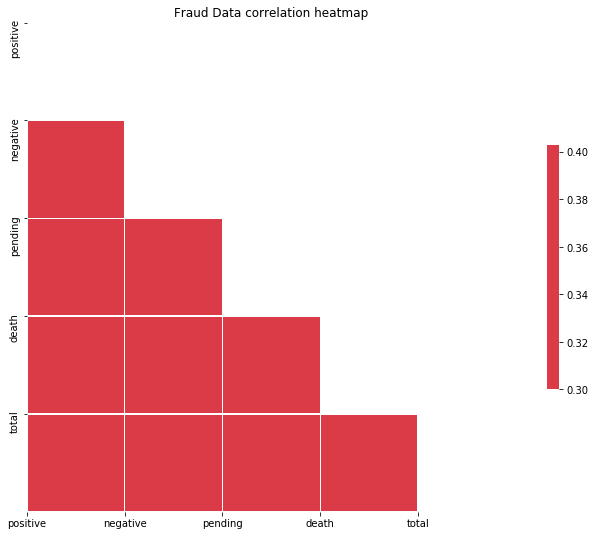

In [5]:
corr = to_date_data[['positive','negative','pending','death','total']].corr()
ticks = [i for i in range(len(corr.columns))]
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(ticks, corr.columns)
plt.yticks(ticks, corr.columns)
plt.title('Fraud Data correlation heatmap')
plt.show()

I don't trust these states states reporting— they're only reporting the positives 

In [34]:
onlypos = daily_data[daily_data['scaled_positives']==1]
untrustworthy_states = list(onlypos.state.value_counts().index)
untrustworthy_states.remove('NY')
subset = daily_data[~daily_data['state'].isin(untrustworthy_states)]
untrustworthy_states

['GA',
 'TX',
 'HI',
 'MA',
 'NC',
 'TN',
 'WY',
 'UT',
 'MO',
 'IN',
 'PA',
 'VI',
 'NJ',
 'WA',
 'MD',
 'OK',
 'RI']

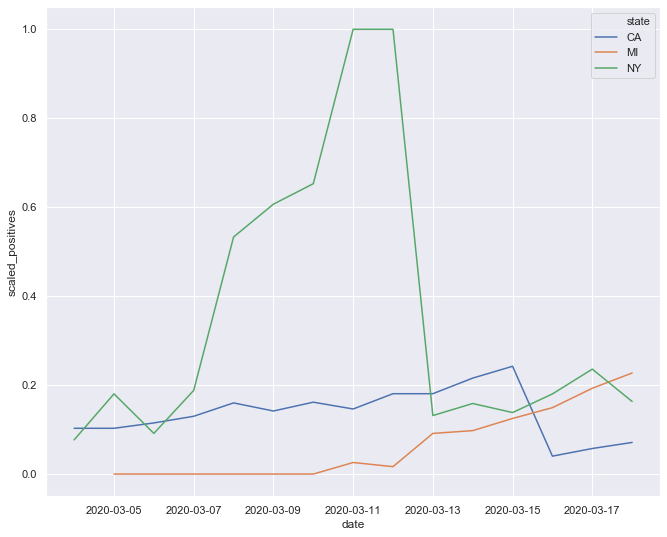

In [35]:
f, ax = plt.subplots(figsize=(11, 9))
ax =sns.lineplot(x = 'date', y = 'scaled_positives', hue = 'state', data = subset[subset.state.isin(['NY','MA','MI','CA','WA'])], ax = ax)


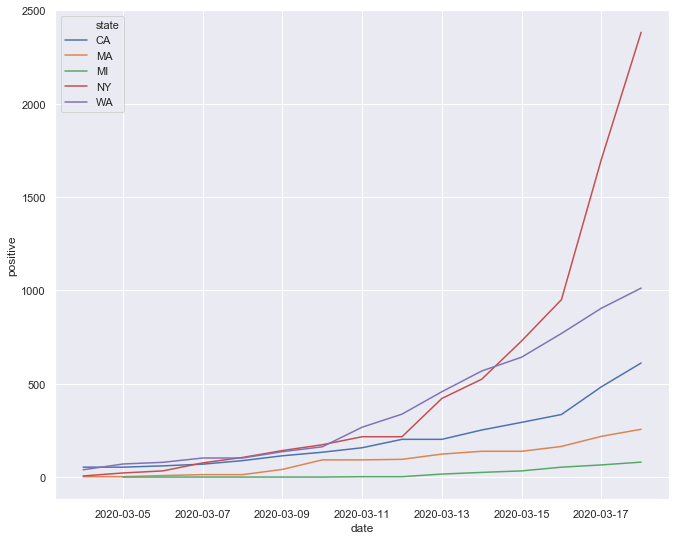

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
ax =sns.lineplot(x = 'date', y = 'positive', hue = 'state', data = daily_data[daily_data['state'].isin(['NY','MA','MI','CA','WA'])], ax = ax)


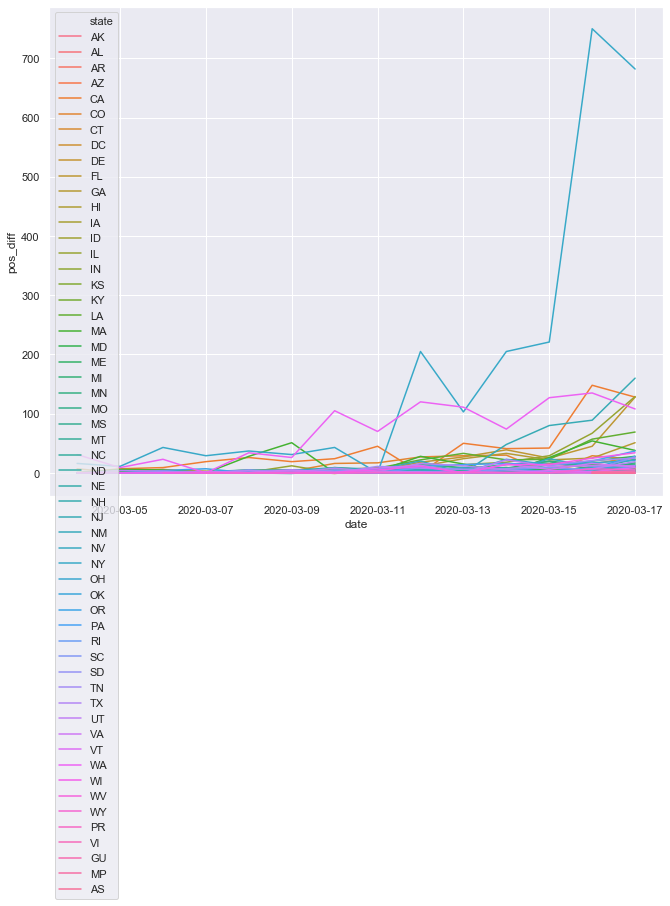

In [53]:
f, ax = plt.subplots(figsize=(11, 9))
ax =sns.lineplot(x = 'date', y = 'pos_diff', hue = 'state', data = daily_data, ax = ax)
